## Notebook for Understanding Provided Data
## Possible endpoints ? 



In [71]:
import pandas as pd 
import matplotlib 
from matplotlib import pyplot as plt
df = pd.read_csv('Eluvio_DS_Challenge.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
time_created    509236 non-null int64
date_created    509236 non-null object
up_votes        509236 non-null int64
down_votes      509236 non-null int64
title           509236 non-null object
over_18         509236 non-null bool
author          509236 non-null object
category        509236 non-null object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [89]:
## Basic Preprocess
titles = df['title']
lt = [len(t) for t in titles ]
df['len_titles'] = lt

df['date_created'] = pd.to_datetime(df['date_created'])
df['time_created'] = pd.to_timedelta(df['time_created'], unit='s')
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,len_titles
0,13903 days 03:34:06,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,33
1,13903 days 03:34:35,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,32
2,13903 days 03:42:03,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,31
3,13903 days 03:54:50,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,44
4,13903 days 15:25:20,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,47


In [90]:
print('\n Total Unique Authors : \t', len(df['author'].unique()))
print('\n Total Unique Categories : \t', len(df['category'].unique()))
print('\n Total True in over_18 : \t', df[df['over_18']==True]['over_18'].count(), ' False: \t',df[df['over_18']==False]['over_18'].count())
print('\n up_votes range: \t Min:', df['up_votes'].min(), '   Max:', df['up_votes'].max(), '   Mean:' ,df['up_votes'].mean() , '   Mode:' ,df.mode()['up_votes'] )
print('\n down_votes range : \t Min:', df['down_votes'].min(), '   Max:',df['down_votes'].max(), '   Mean:' ,df['down_votes'].mean(), '   Mode:'  ,df.mode()['down_votes'] )
print('\n Range Dates: \t Min:', df['date_created'].min(), '   Max:', df['date_created'].max(), '   range:', df['date_created'].max() - df['date_created'].min())
print('\n Range time_created: \t Min:', df['time_created'].min(), '   Max:', df['time_created'].max(), '   range:', df['time_created'].max() - df['time_created'].min())

print('\n Title range : \t Min:', df['len_titles'].min(), '   Max:',df['len_titles'].max(), '   Mean:',df['len_titles'].mean(), '   Mode:' ,df['len_titles'].mode()  )

print('\n Title min: \t', df[df['len_titles'] == df['len_titles'].min()])
print('\n Title max: \t', df[df['len_titles'] == df['len_titles'].max()])




 Total Unique Authors : 	 85838

 Total Unique Categories : 	 1

 Total True in over_18 : 	 320  False: 	 508916

 up_votes range: 	 Min: 0    Max: 21253    Mean: 112.23628337352426    Mode: 0    0
Name: up_votes, dtype: int64

 down_votes range : 	 Min: 0    Max: 0    Mean: 0.0    Mode: 0    0
Name: down_votes, dtype: int64

 Range Dates: 	 Min: 2008-01-25 00:00:00    Max: 2016-11-22 00:00:00    range: 3224 days 00:00:00

 Range time_created: 	 Min: 13903 days 03:34:06    Max: 17127 days 12:22:26    range: 3224 days 08:48:20

 Title range : 	 Min: 1    Max: 320    Mean: 89.44608197378032    Mode: 0    59
dtype: int64

 Title min: 	               time_created date_created  up_votes  down_votes title  over_18  \
19681  14205 days 03:54:38   2008-11-22         0           0     ?    False   
184330 15851 days 04:28:10   2013-05-26         0           0     .    False   

          author   category  len_titles  
19681      lilaz  worldnews           1  
184330  dkffkfhf  worldnews      

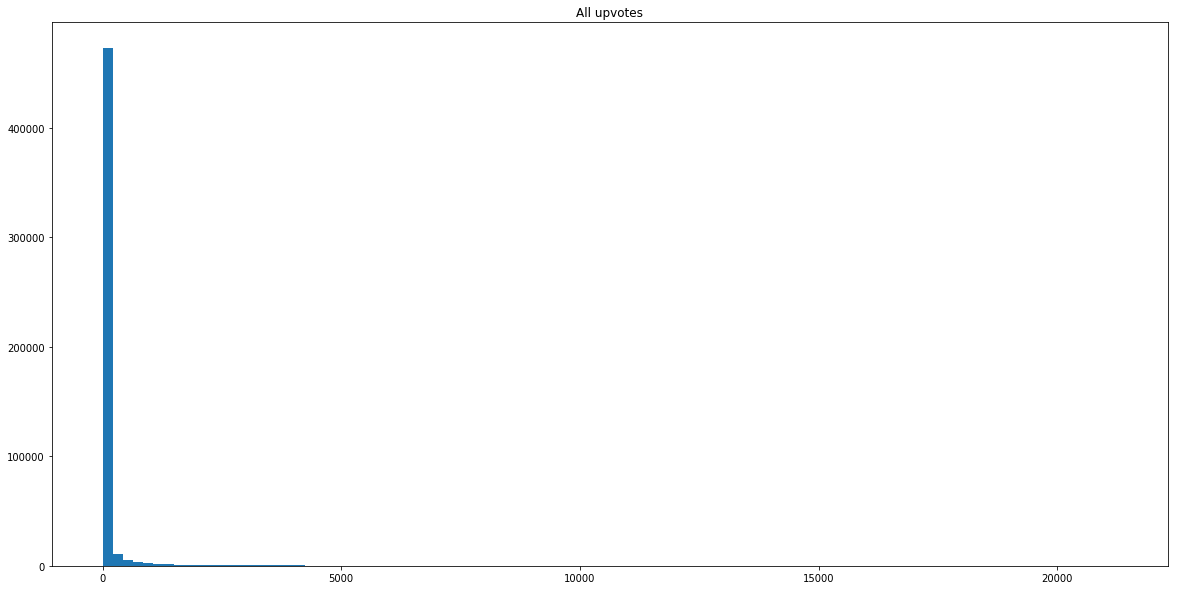

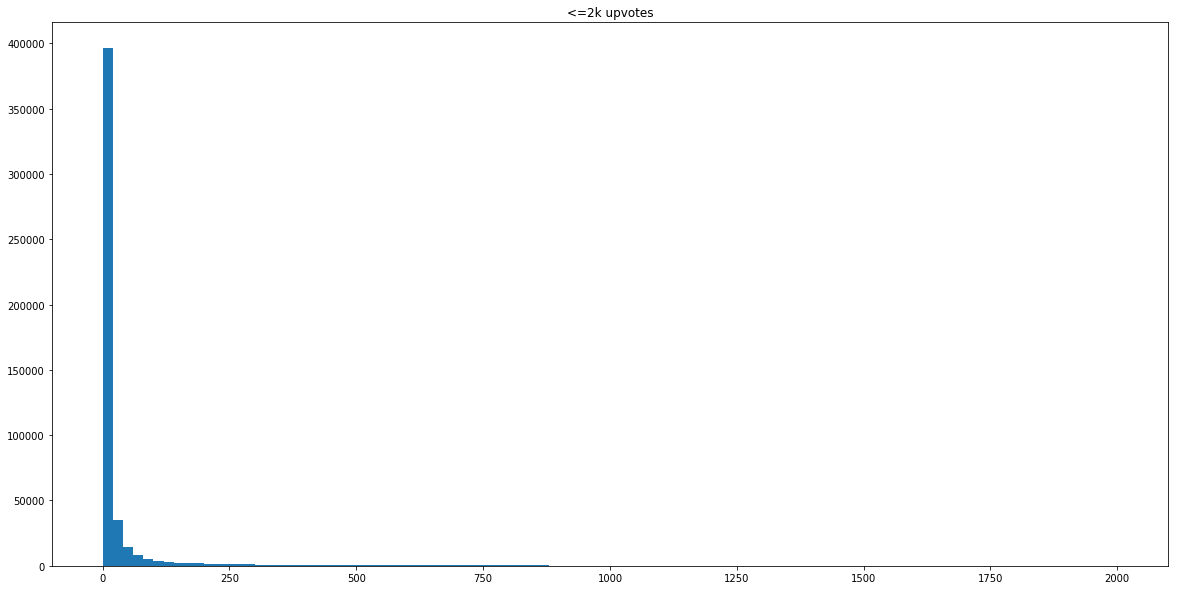

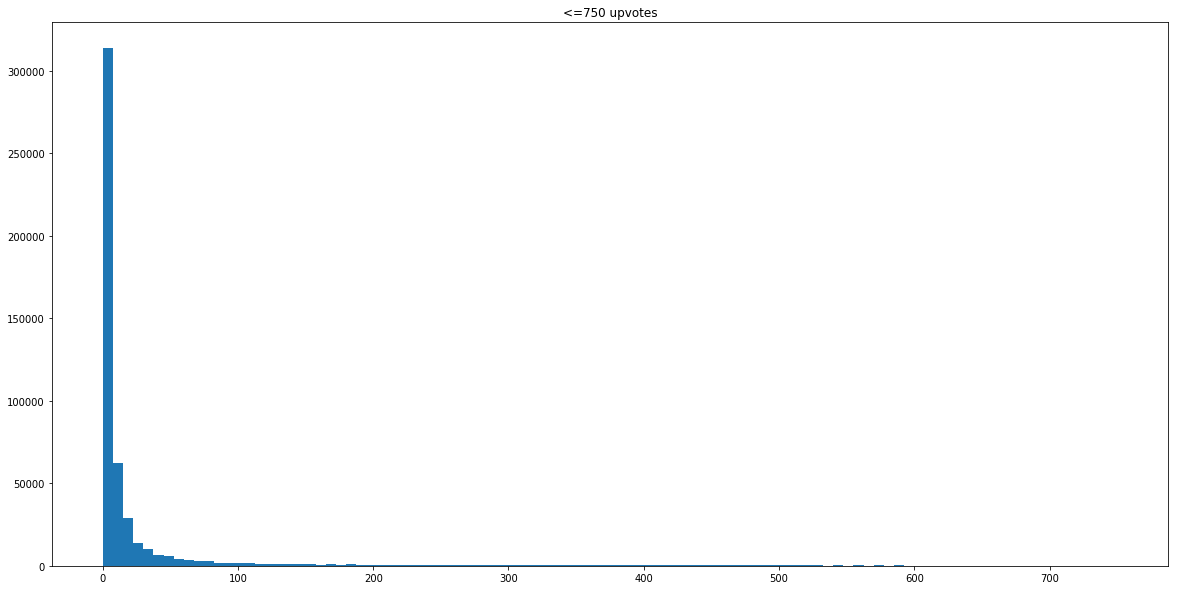

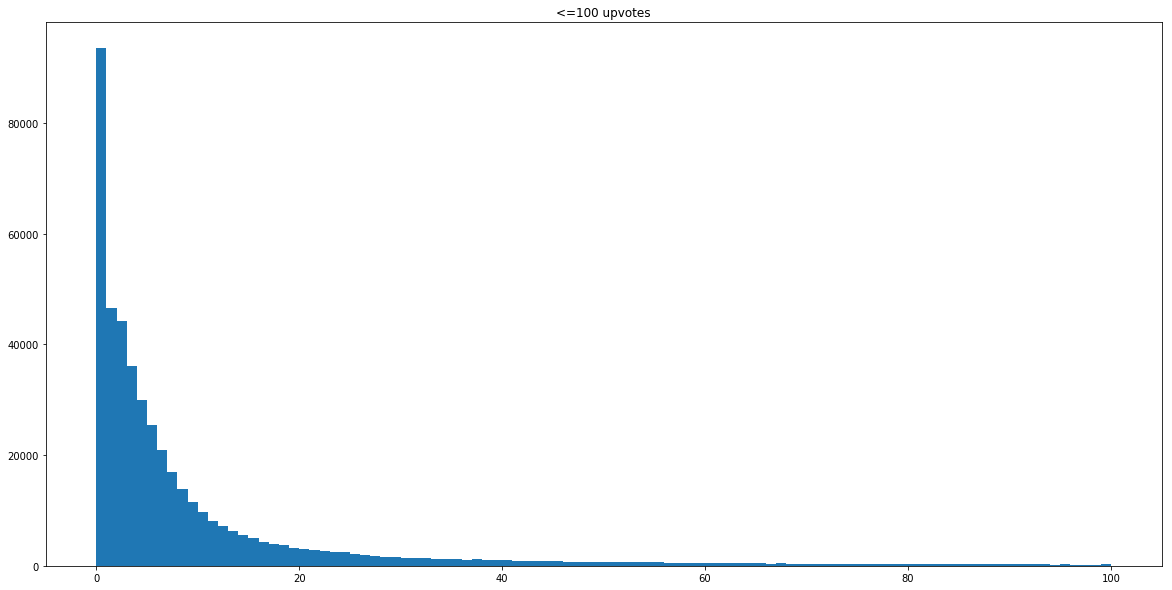

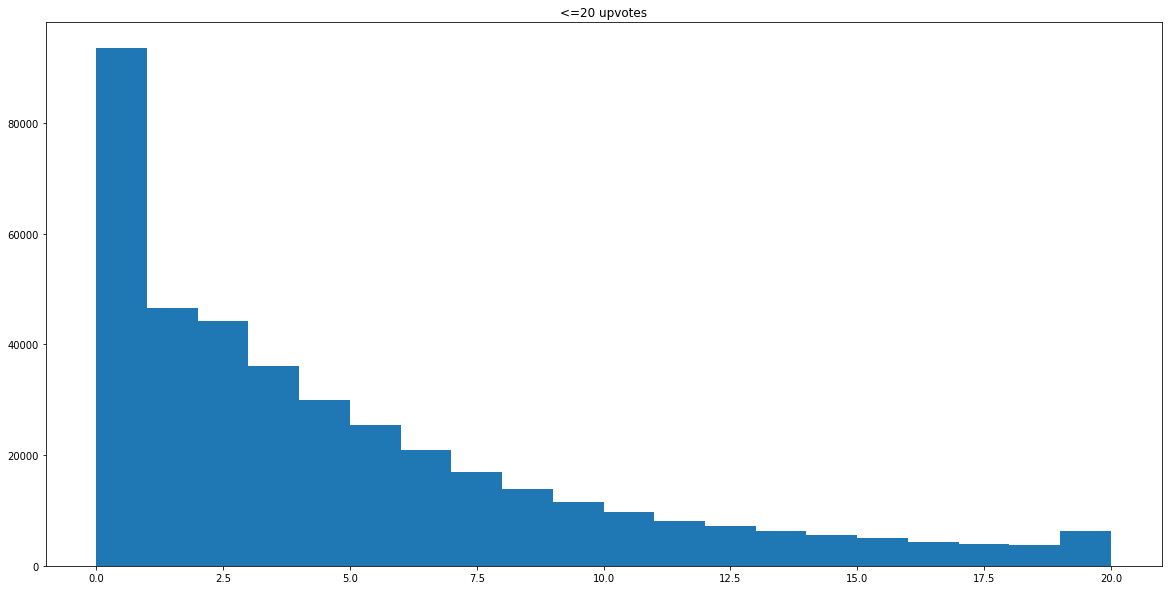

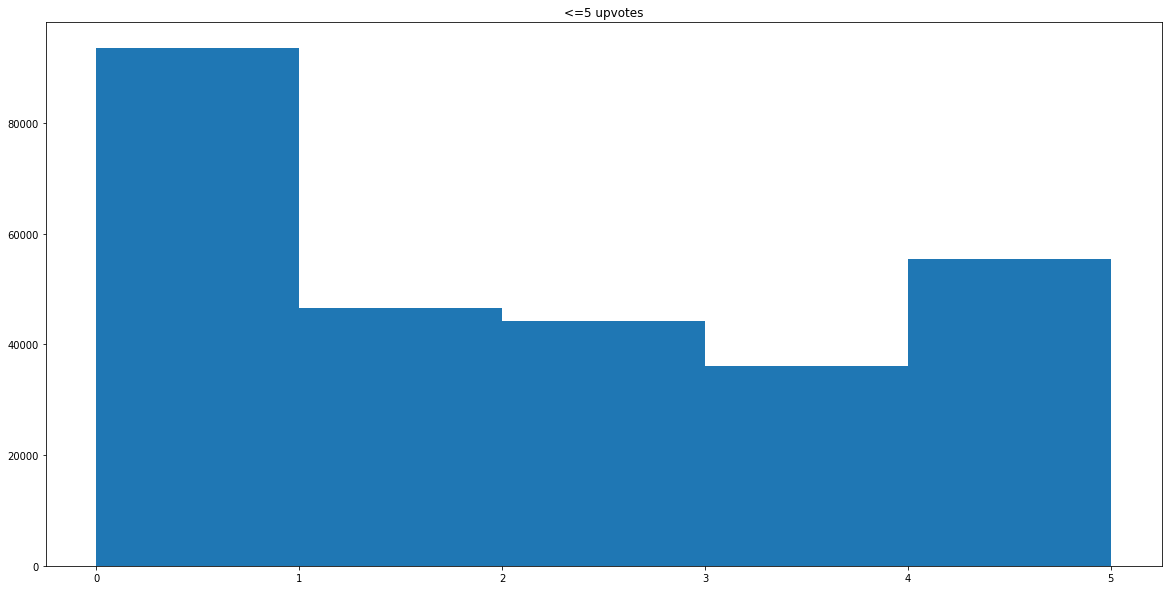

In [86]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df['up_votes'], bins=100)
plt.title('All upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=2000]['up_votes'] , bins=100)
plt.title('<=2k upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=750]['up_votes'] , bins=100)
plt.title('<=750 upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=100]['up_votes'] , bins=100)
plt.title('<=100 upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=20]['up_votes'] , bins=20)
plt.title('<=20 upvotes')
plt.show()

plt.hist(df[df['up_votes'] <=5]['up_votes'] , bins=5)
plt.title('<=5 upvotes')
plt.show()

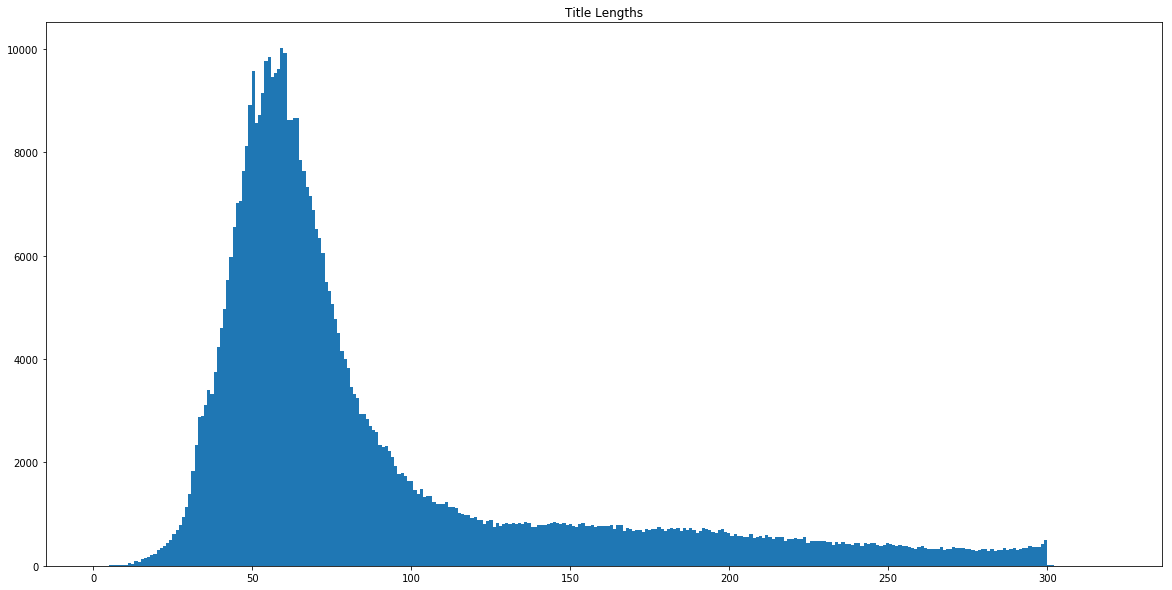

In [91]:

plt.hist(df[df['len_titles'] <=400]['len_titles'] , bins=320)
plt.title('Title Lengths')
plt.show()

1 8897 [8897, 5730, 5037, 4023, 4013, 3170, 2923, 2658, 2564, 2503, 2493, 2448, 2405, 2181, 2108, 2077, 1897, 1770, 1698, 1649, 1616, 1562, 1516, 1490, 1399, 1397, 1223, 1199, 1183, 1180, 1170, 1094, 1092, 1016, 1012, 1000, 994, 979, 970, 962, 952, 938, 936, 915, 903, 892, 886, 883, 863, 851]


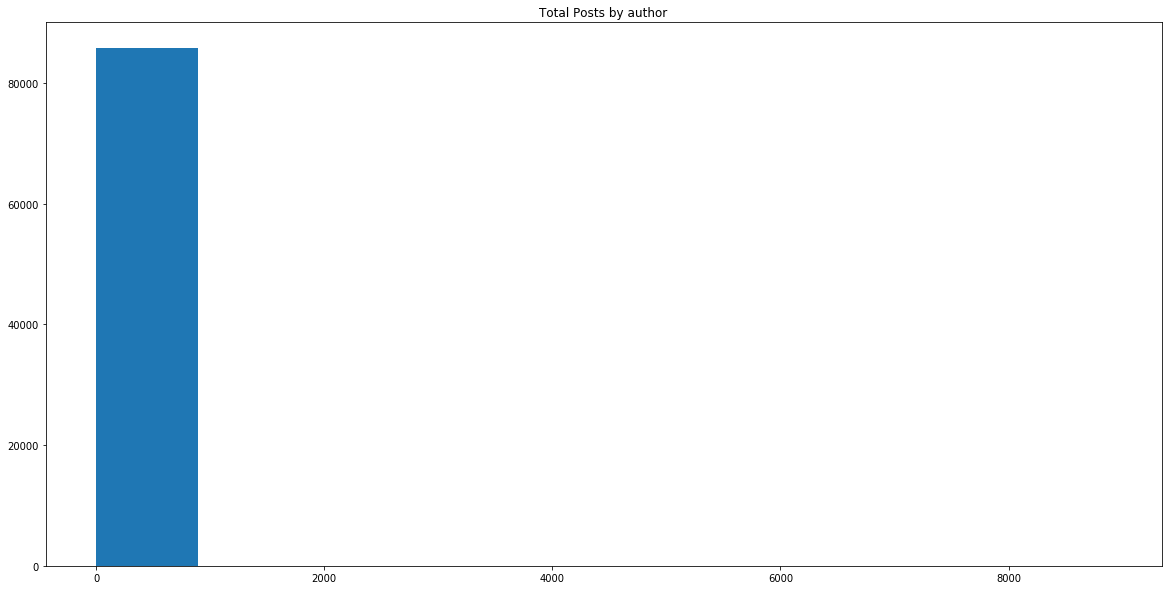

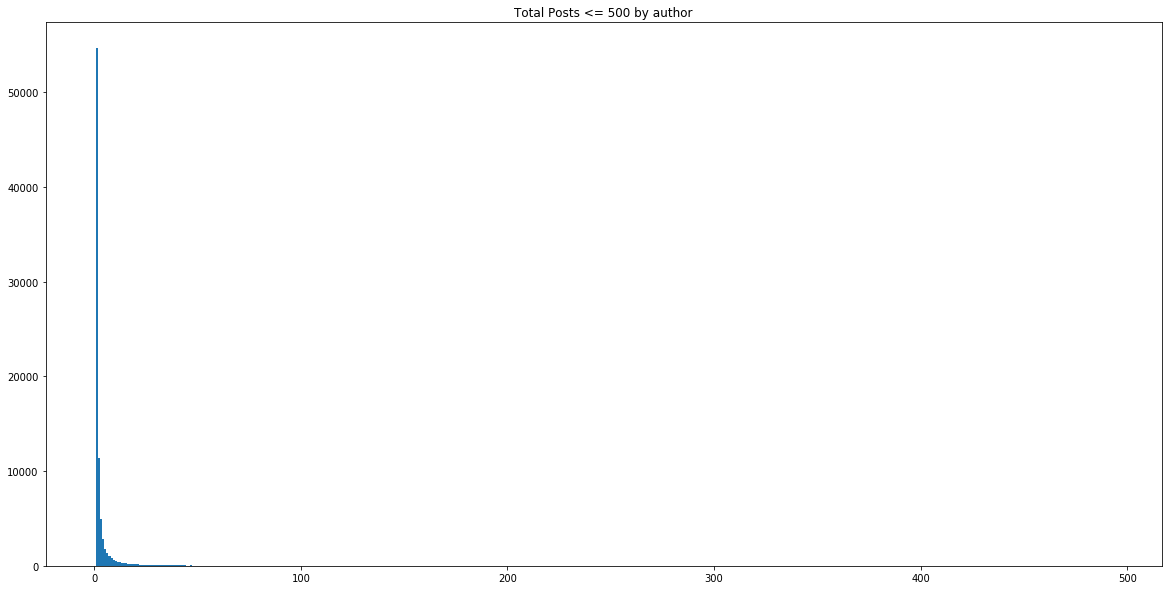

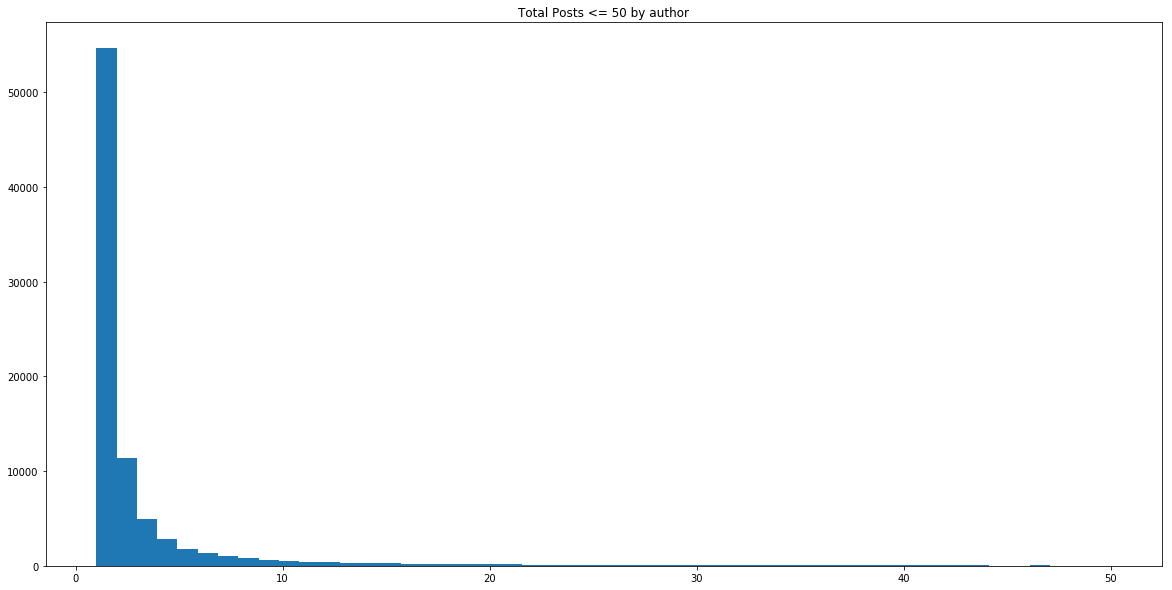

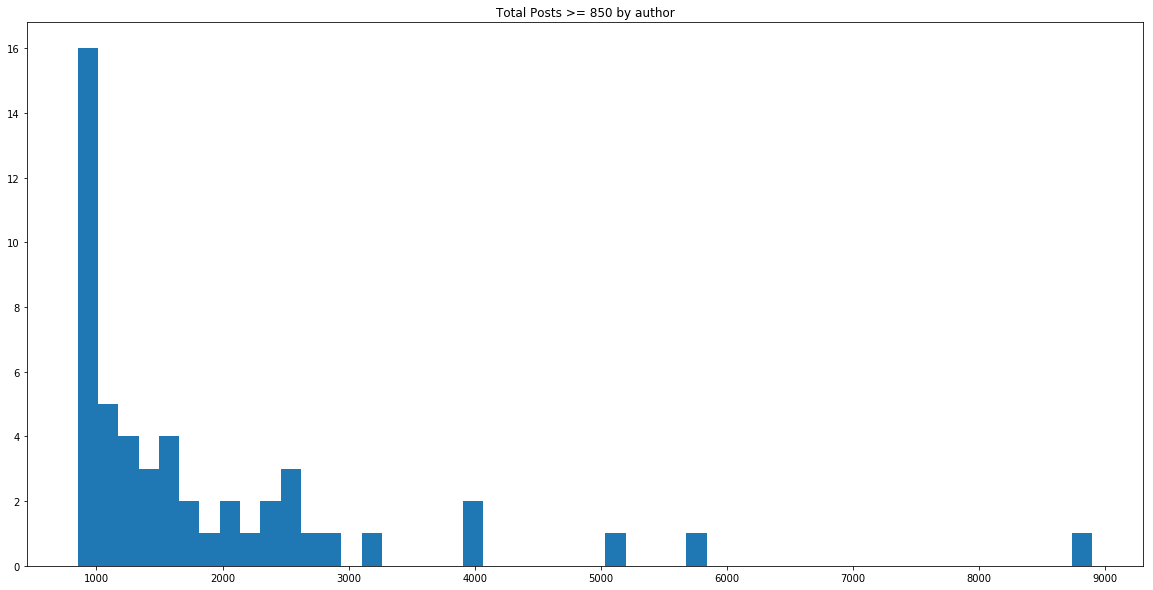

In [120]:
tmp = tdf['author'].value_counts()
print(tmp.min(), tmp.max(), sorted(tmp, reverse=True)[:50] )

plt.hist(tmp, bins=10)
plt.title('Total Posts by author')
plt.show()
plt.hist(tmp[tmp<=500], bins=500)
plt.title('Total Posts <= 500 by author')
plt.show()

plt.hist(tmp[tmp<=50], bins=50)
plt.title('Total Posts <= 50 by author')
plt.show()

plt.hist(tmp[tmp>=850], bins=50)
plt.title('Total Posts >= 850 by author')
plt.show()

the 212420
to 212195
in 208504
of 174552
and 87003
for 80271
on 73542
is 42733
with 39449
as 39168
by 37706
from 35254
at 32545
that 29434
has 29216
after 29167
china 26397
says 25432
over 25094
us 24918


TypeError: <lambda>() missing 1 required positional argument: 'height'

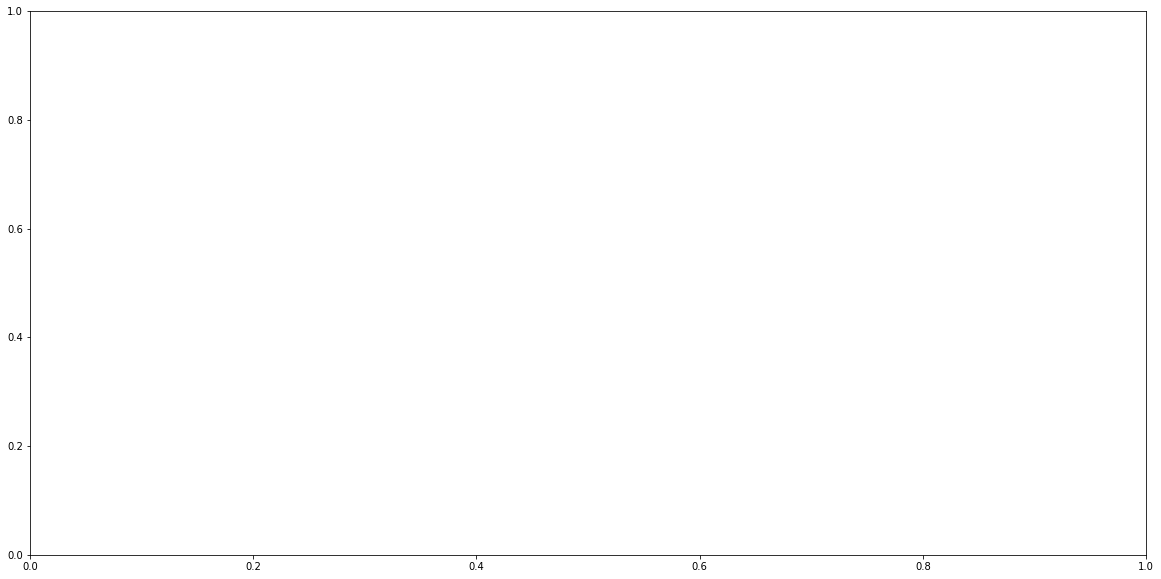

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['title'], 20)

the 212420
to 212195
in 208504
of 174552
and 87003
for 80271
on 73542
is 42733
with 39449
as 39168
by 37706
from 35254
at 32545
that 29434
has 29216
after 29167
china 26397
says 25432
over 25094
us 24918


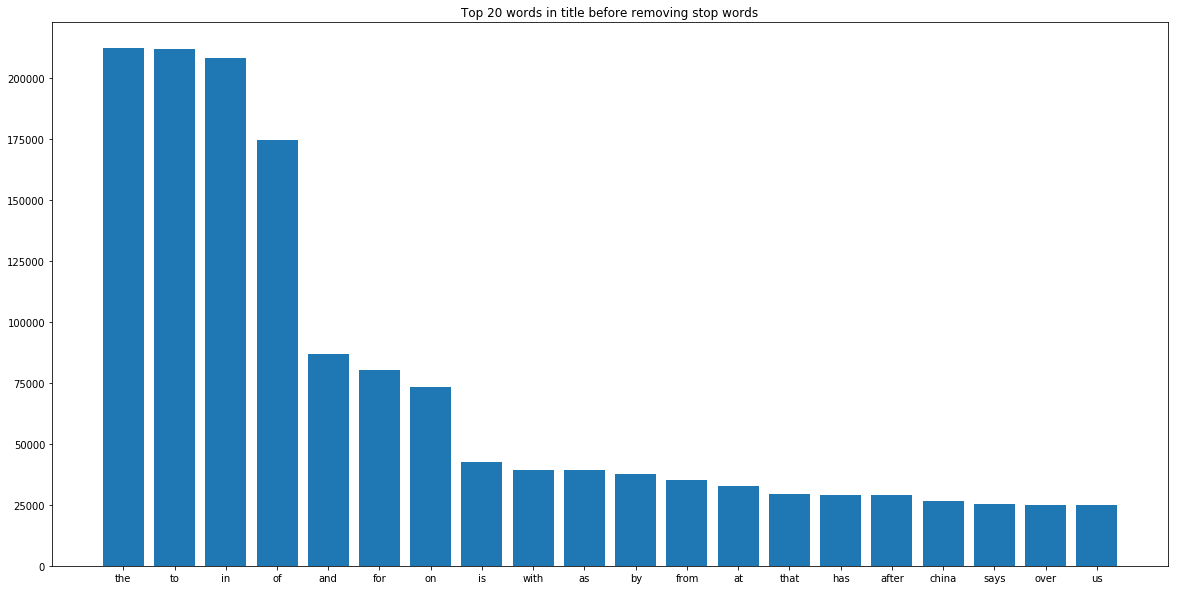

In [131]:
for word, freq in common_words:
    print(word, freq)
plt.bar([v[0] for v in common_words], [v[1] for v in common_words])
plt.title('Top 20 words in title before removing stop words')
plt.show()

In [132]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['title'], 20)

china 26397
says 25432
new 23388
syria 19023
russia 18766
world 18091
police 16654
government 16305
israel 16048
iran 15816
president 15271
killed 14328
people 13991
state 13489
attack 12925
war 12820
russian 12378
military 11828
uk 11784
north 11589


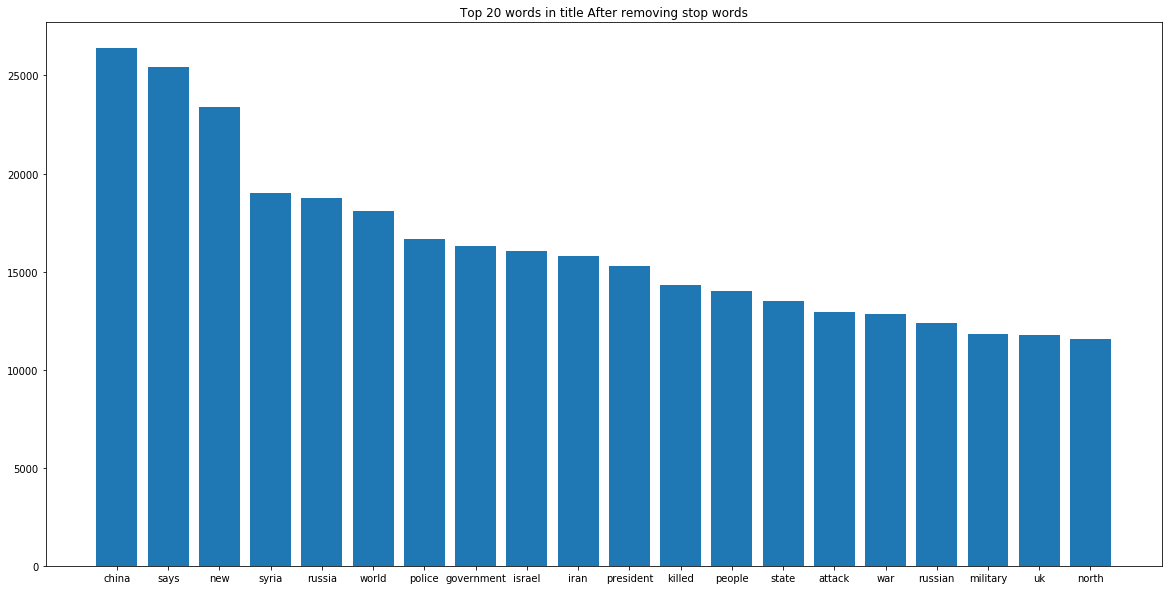

In [133]:
for word, freq in common_words:
    print(word, freq)
plt.bar([v[0] for v in common_words], [v[1] for v in common_words])
plt.title('Top 20 words in title After removing stop words')
plt.show()

In [137]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_bigram = get_top_n_bigram(df['title'], 20)

In [138]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_trigram = get_top_n_trigram(df['title'], 20)

north korea 7111
islamic state 5309
prime minister 4797
bbc news 4173
year old 3780
human rights 3547
saudi arabia 3493
south korea 2701
al qaeda 2638
climate change 2284
united states 2221
hong kong 2062
middle east 1828
china sea 1747
west bank 1735
boko haram 1678
south china 1630
south africa 1610
north korean 1533
new zealand 1521


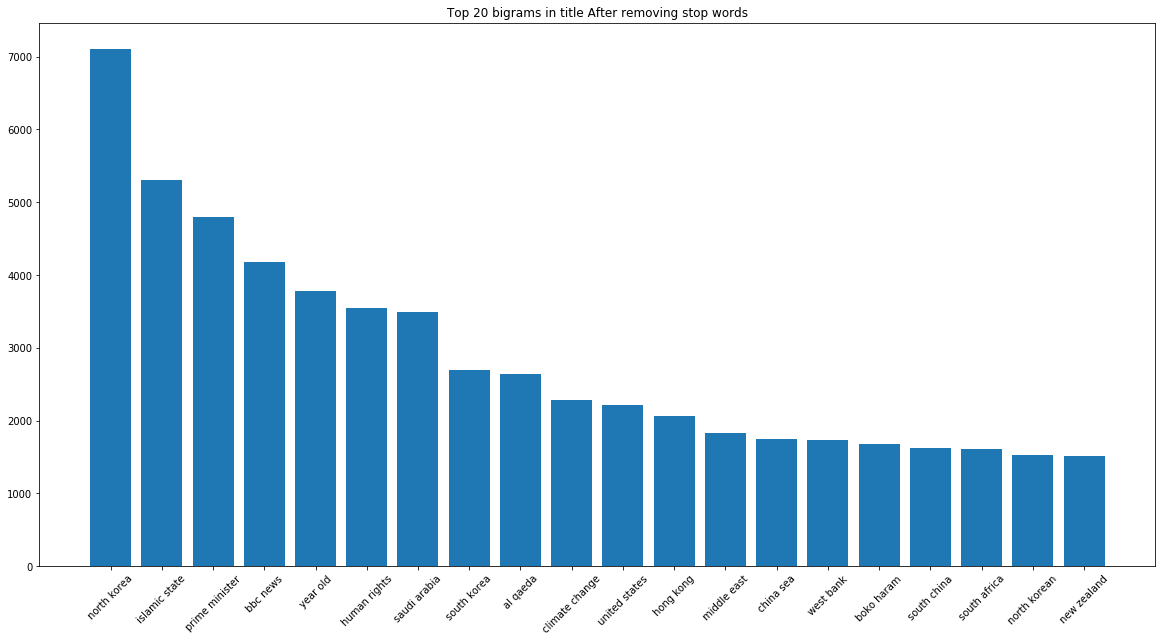

south china sea 1062
bashar al assad 422
central african republic 381
al jazeera english 313
president bashar al 282
human rights watch 253
international criminal court 217
new york times 207
osama bin laden 206
islamic state militants 205
death toll rises 202
world war ii 189
nuclear power plant 185
islamic state group 183
year old girl 182
nobel peace prize 180
aung san suu 178
san suu kyi 177
president vladimir putin 176
ban ki moon 175


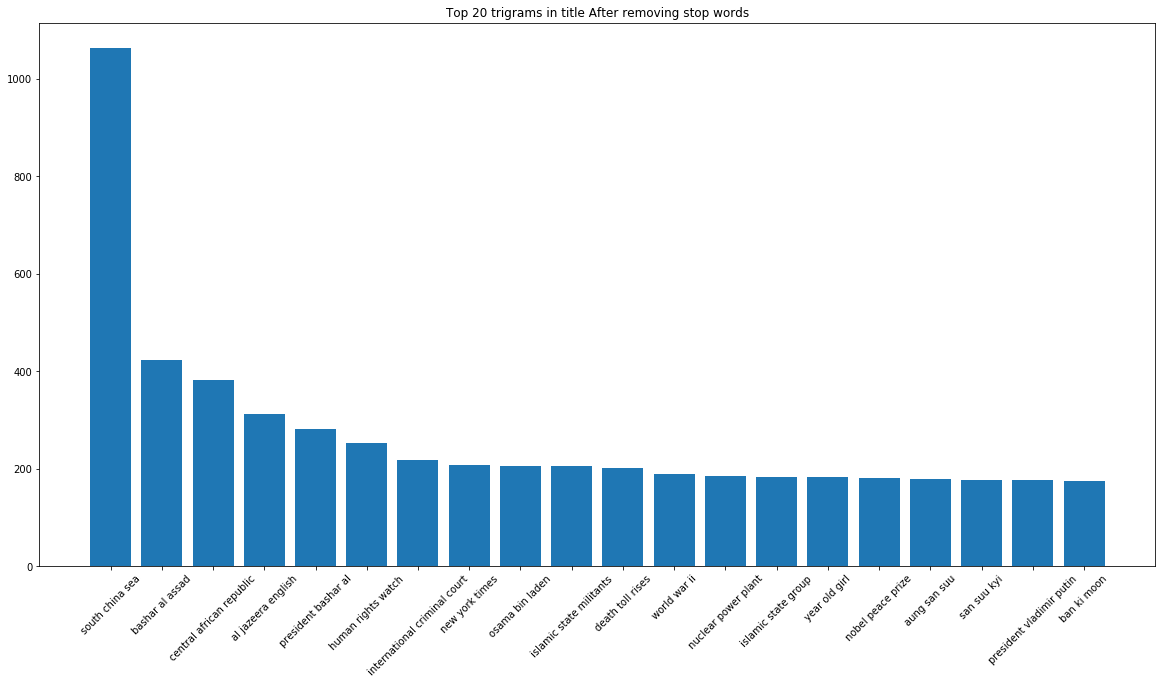

In [144]:
for word, freq in common_words_bigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_bigram], [v[1] for v in common_words_bigram])
plt.title('Top 20 bigrams in title After removing stop words')
plt.xticks(rotation=45)
plt.show()
for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 20 trigrams in title After removing stop words')
plt.xticks(rotation=45)
plt.show()

south china sea 236
osama bin laden 116
bashar al assad 108
central african republic 99
al jazeera english 97
nobel peace prize 95
iran nuclear deal 66
human rights watch 63
year old girl 63
president barack obama 62
malaysia airlines flight 62
kim jong il 61
president bashar al 59
ban ki moon 57
north korea threatens 56
news flash summary 55
evening news flash 55
stories uk links 55
uk links associated 55
summary quick summary 55


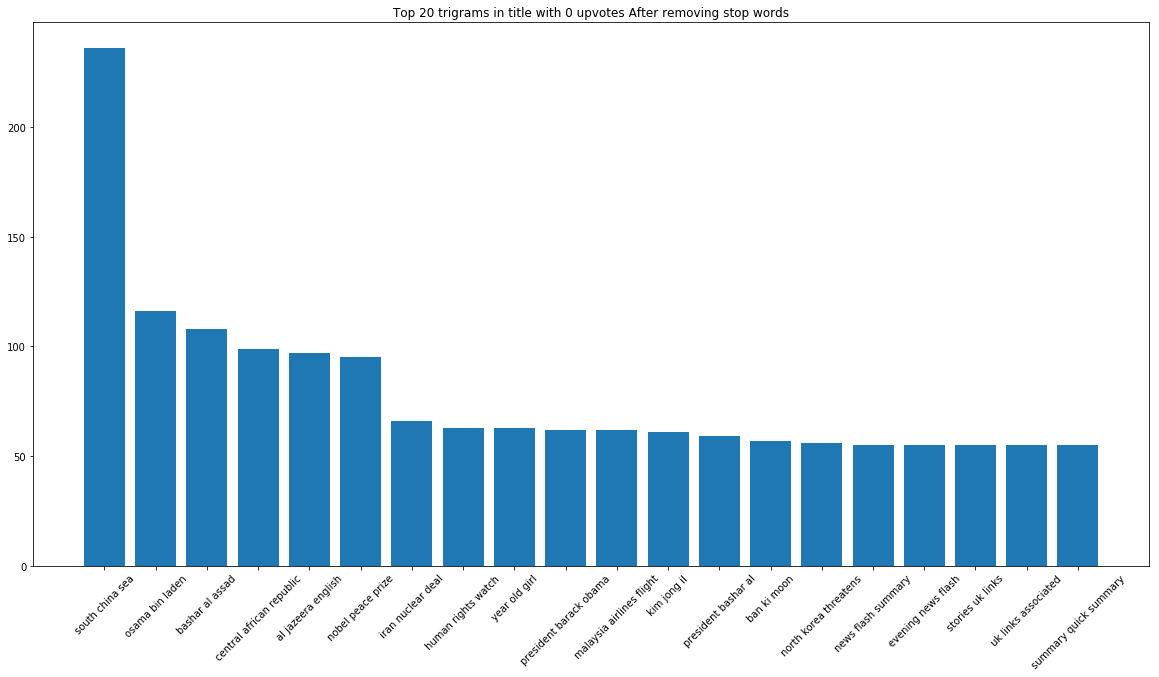

south china sea 260
year old girl 158
president vladimir putin 156
great barrier reef 143
bashar al assad 137
human rights watch 131
president barack obama 105
world war ii 97
chancellor angela merkel 96
000 year old 96
president bashar al 93
islamic state militants 93
central african republic 90
osama bin laden 89
child sex abuse 88
new york times 88
nobel peace prize 88
year old boy 83
russian president vladimir 78
trans pacific partnership 76


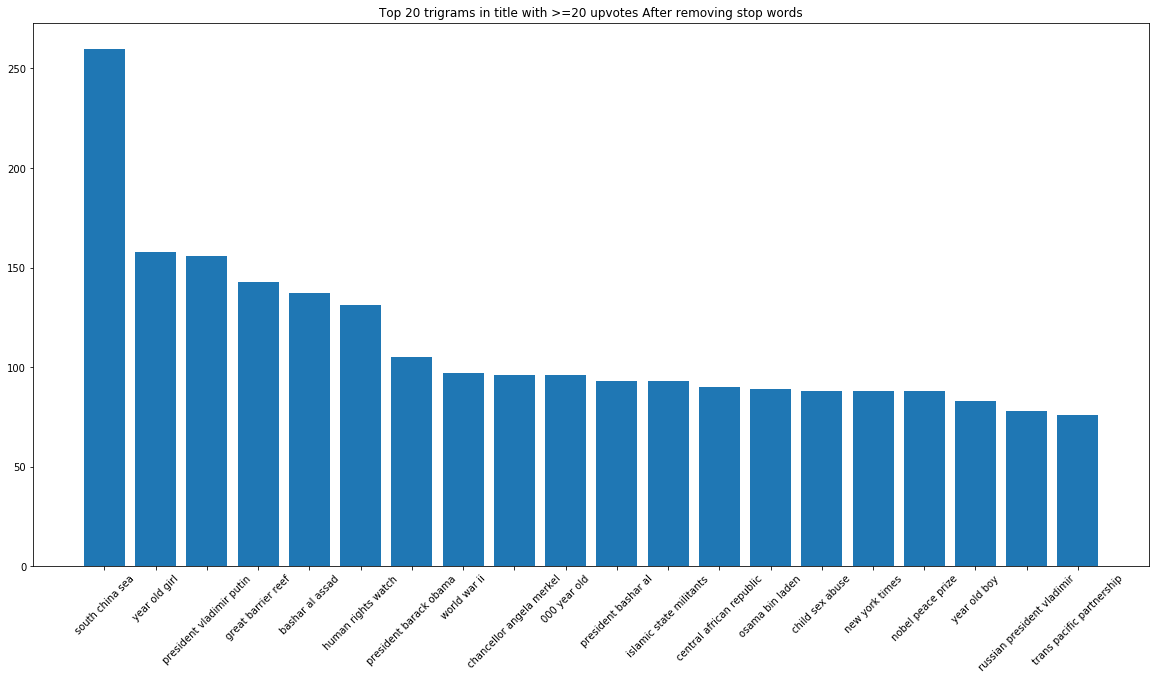

south china sea 1062
bashar al assad 422
central african republic 381
al jazeera english 313
president bashar al 282
human rights watch 253
international criminal court 217
new york times 207
osama bin laden 206
islamic state militants 205
death toll rises 202
world war ii 189
nuclear power plant 185
islamic state group 183
year old girl 182
nobel peace prize 180
aung san suu 178
san suu kyi 177
president vladimir putin 176
ban ki moon 175


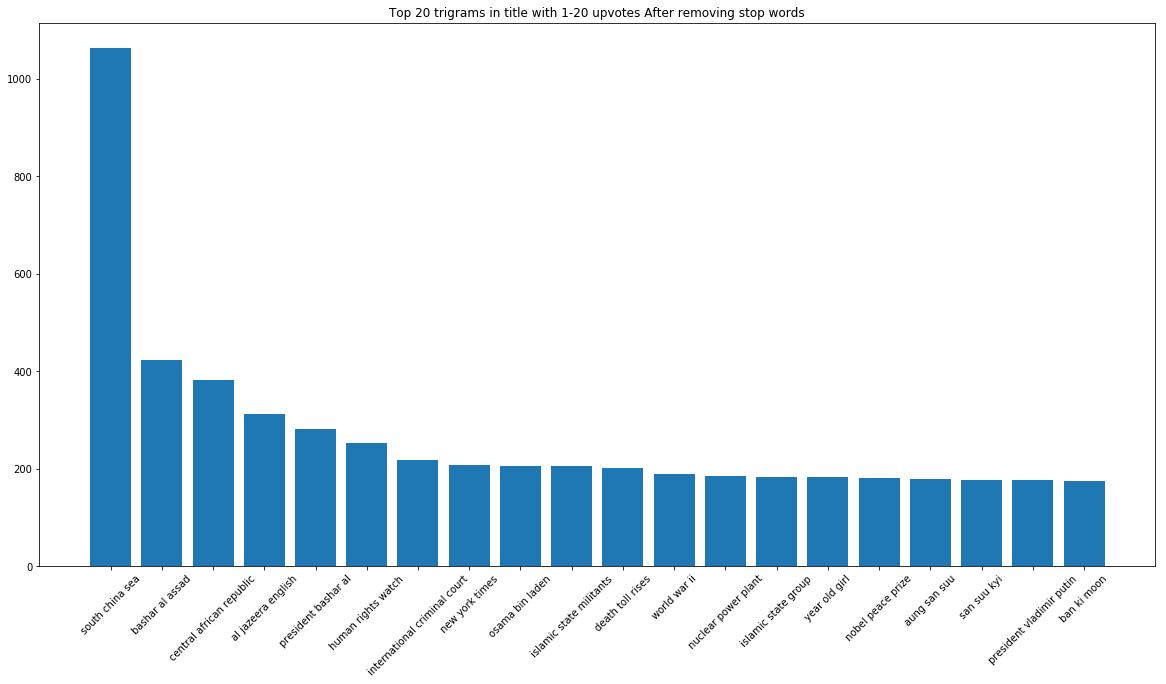

In [145]:
common_words_trigram = get_top_n_trigram(df[df['up_votes'] ==0 ]['title'], 20)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 20 trigrams in title with 0 upvotes After removing stop words')
plt.xticks(rotation=45)
plt.show()

common_words_trigram = get_top_n_trigram(df[df['up_votes'] >=20 ]['title'], 20)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 20 trigrams in title with >=20 upvotes After removing stop words')
plt.xticks(rotation=45)
plt.show()

common_words_trigram = get_top_n_trigram(df[df['up_votes'].between(1,19)]['title'], 20)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 20 trigrams in title with 1-20 upvotes After removing stop words')
plt.xticks(rotation=45)
plt.show()

In [150]:
df.groupby('author').sum().sort_values('up_votes', ascending=False)

,up_votes,down_votes,over_18,len_titles
author,,,,
maxwellhill,1985416,0,0.0,601592
anutensil,1531544,0,0.0,1180468
Libertatea,832102,0,1.0,432706
DoremusJessup,584380,0,0.0,809557
Wagamaga,580121,0,0.0,274893
NinjaDiscoJesus,492582,0,1.0,312079
madazzahatter,428966,0,0.0,533968
madam1,390541,0,0.0,607168
davidreiss666,338306,0,0.0,1573817
